# Fashion MNIST Dataset
Original data source: https://github.com/zalandoresearch/fashion-mnist

## Context
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset


## Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

![Fashion MNIST dataset Image from githhub](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

* To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
* For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram above.


### Labels

Each training and test example is assigned to one of the following labels:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot


TL;DR

* Each row is a separate image
* Column 1 is the class label.
* Remaining columns are pixel numbers (784 total).
* Each value is the darkness of the pixel (1 to 255)

In this notebook, we’ll learn how to:

Read in data and with appropriate transforms (nearly identical to the prior tutorial).
1. Set up TensorBoard.
2. Write to TensorBoard.
3. Inspect a model architecture using TensorBoard.
4.Use TensorBoard to create interactive versions of the visualizations we created in last tutorial, with less code
5. Specifically, on point #5, we’ll see:

A couple of ways to inspect our training data
* How to track our model’s performance as it trains
* How to assess our model’s performance once it is trained.
## Data Loading and Visualization

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


### Checking for `CUDA` device.

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


### Setting up transformations 

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),])

### Loading the data

In [4]:
train_ds = torchvision.datasets.FashionMNIST(root = './data', 
                                             train=True, 
                                             download=True,  
                                             transform=transform)
test_ds = torchvision.datasets.FashionMNIST(root = './data', 
                                             train=False, 
                                             download=True,  
                                             transform=transform)

# Convert dataset into a DataLoader
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle= True, num_workers=2)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=16, shuffle= False, num_workers=2)
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
           'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

### Dataset Visualization

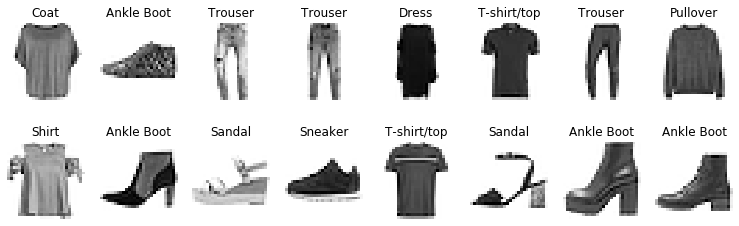

In [5]:
def grid_show(images, labels, classes, preds = None):
    """
    This function makes grid of images and labels given. 
    Both original labels and predictions can be given. 
    """
    no_of_images = images.shape[0]
    cols = 8
    rows = no_of_images // cols
    # Changing the channels of the image in order to fit it to the matplotlib format view
    if images.is_cuda:
        images = images.cpu()
    images = np.array(images)
    # De Normalizing the images
    images = (images/2 + 0.5)*255
    

    plt.figure(figsize=(cols+5, rows+2))
    index = 0
    for i in range(rows):
        for j in range(cols):
            plt.subplot(rows, cols, index+1)
            plt.imshow(images[index].astype('uint8').reshape(28,28), cmap="Greys")
            if preds is None:
                plt.title(str(classes[labels[index].item()]))
            else:
                plt.title(str(classes[labels[index].item()]) + '/' + str(classes[preds[index].item()]))
            plt.axis(False)
            index +=1
    plt.show()
    
    
# Calling the above function
dataiter = iter(train_dl)
images, labels = dataiter.next()
grid_show(images, labels, classes)

### Defining the model architecture

In [24]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16*4*4, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features= 84)
        self.fc3 = nn.Linear(in_features=84, out_features= 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
model = Net()
model.to(device)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

### Setting up `loss_func` and `optimizer`

In [25]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
epochs = 5

### Defining the training loop

In [44]:
def fit (epochs, model, train_dl, loss_func, optimizer):
    for epoch in range(epochs):         #One epoch runs over the whole image set
        total_loss = 0.0
        running_loss = 0.0
        valid_loss = 0.0
        valid_size = 0
        for i, data in enumerate(train_dl, start=0):
            xb, yb = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()

            # Forward  + backward + optimize
            preds = model(xb)
            loss = loss_func(preds, yb)
            loss.backward()
            optimizer.step()

            #print statistics for training loss
            running_loss += loss.item()
            total_loss += loss.item()
            if i%500==499:
                print('[Epoch: %d, Batch: %5d] loss: %.4f' %(epoch, i+1, running_loss/500))
                running_loss = 0.0
            
        with torch.no_grad():
            for i, data in enumerate(train_dl, start=0):
                xb, yb = data[0].to(device), data[1].to(device)
                valid_loss += loss_func(model(xb), yb)
                valid_size += len(yb)
#             print('Valid Loss: ', (valid_loss/valid_size).item())
        print('[Epoch: %d Summary ->] Train loss: %.4f Valid loss: %.4f' %(epoch, total_loss/60000,  (valid_loss/valid_size).item()))
    print('Finished Training :) ')

In [52]:
fit (10, model, train_dl, loss_func, optimizer)

[Epoch: 0, Batch:   500] loss: 0.0717
[Epoch: 0, Batch:  1000] loss: 0.0723
[Epoch: 0, Batch:  1500] loss: 0.0792
[Epoch: 0, Batch:  2000] loss: 0.0841
[Epoch: 0, Batch:  2500] loss: 0.0786
[Epoch: 0, Batch:  3000] loss: 0.0836
[Epoch: 0, Batch:  3500] loss: 0.0920
[Epoch: 0 Summary ->] Train loss: 0.0051 Valid loss: 0.0047
[Epoch: 1, Batch:   500] loss: 0.0781
[Epoch: 1, Batch:  1000] loss: 0.0702
[Epoch: 1, Batch:  1500] loss: 0.0765
[Epoch: 1, Batch:  2000] loss: 0.0714
[Epoch: 1, Batch:  2500] loss: 0.0807
[Epoch: 1, Batch:  3000] loss: 0.0858
[Epoch: 1, Batch:  3500] loss: 0.0877
[Epoch: 1 Summary ->] Train loss: 0.0050 Valid loss: 0.0041
[Epoch: 2, Batch:   500] loss: 0.0703
[Epoch: 2, Batch:  1000] loss: 0.0800
[Epoch: 2, Batch:  1500] loss: 0.0754
[Epoch: 2, Batch:  2000] loss: 0.0752
[Epoch: 2, Batch:  2500] loss: 0.0796
[Epoch: 2, Batch:  3000] loss: 0.0846
[Epoch: 2, Batch:  3500] loss: 0.0805
[Epoch: 2 Summary ->] Train loss: 0.0049 Valid loss: 0.0040
[Epoch: 3, Batch:   50

### Saving and reloading the trained model.

In [54]:
# Saving the trained model
savepath = './fashion-stage1-gpu.pth'
torch.save(model.state_dict(), savepath)

In [9]:
savepath = './fashion-stage1-gpu.pth'
model.load_state_dict(torch.load(savepath))

<All keys matched successfully>

### Calculating the model accuracy

In [47]:
def get_accuracy(model, test_dl):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_dl:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return  100 * correct / total

In [53]:
get_accuracy(model, test_dl)

90.15

### Visualizing the pretrained model's performance

In [13]:
def get_predictions(model, images):
    """
    Inference function for a single batch
    """
    with torch.no_grad():
        _, predicted = torch.max(model(images), 1)
    return predicted


def show_predictions(model, test_dl, classes, batches = 1):
    """Function to show the predictions in a grid format for mutiple batches."""
    print('Original/Predicted')
    dataiter = iter(test_dl)
    
    for i in range(batches):
        data = dataiter.next()
        print('Batch No: ', i+1)
        images, labels = data[0].to(device), data[1].to(device) 
        preds = get_predictions(model, images)
        grid_show(images, labels, classes, preds=preds)

Original/Predicted
Batch No:  1


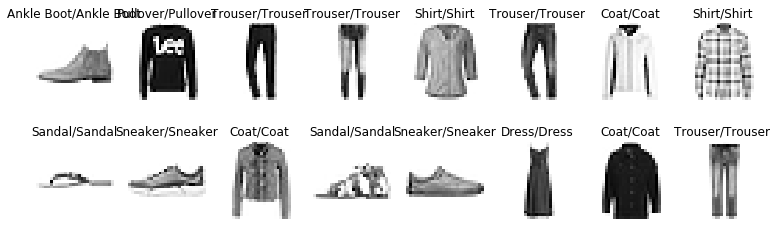

Batch No:  2


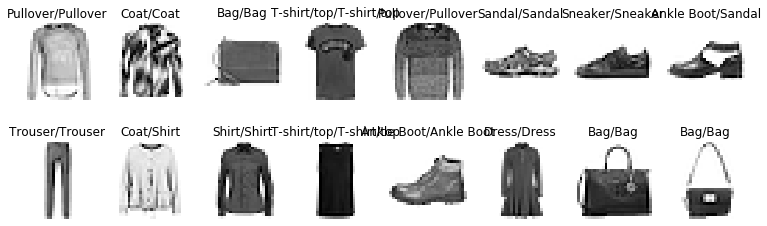

In [14]:

show_predictions(model, test_dl, classes, batches=2)

# Visualization with TensorBoard
### 1. TensorBoard setup
Now we’ll set up TensorBoard, importing tensorboard from `torch.utils` and defining a `SummaryWriter`, our key object for writing information to TensorBoard.

In [15]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

### 2. Writing to TensorBoard
Now let’s write an image to our TensorBoard - specifically, a grid - using make_grid.

In [19]:
dataiter = iter(train_dl)
images, labels = dataiter.next()
imggrid = torchvision.utils.make_grid(images)
# writer.add_image('one_batch_fashion_images', imggrid)
writer.add_images('image_data_batch', images)

### 3. Inspect the model using TensorBoard
One of TensorBoard’s strengths is its ability to visualize complex model structures. Let’s visualize the model we built.

In [55]:
writer.add_graph(model.cpu(),images )

In [56]:
writer.close()

### 4. Add a Projector to the TensorBoard

In [58]:
def random_n_select(data, labels, n=100):
    assert len(data) == len(labels)
    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

In [64]:
# Selecting n random images from the dataset
images, labels = random_n_select(train_ds.data , train_ds.targets, 200)
class_labels = [classes[lab] for lab in labels]

In [65]:
features = images.view(-1, 28 * 28)
writer.add_embedding(features, metadata=class_labels, label_img=images.unsqueeze(1))
writer.close()